# Baseline LSTM-CNN + TF-IDF Unigram

## Import Library

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Dense, Dropout, Conv1D, LSTM, MaxPool1D, Flatten
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

## Import Dataset

In [2]:
df = pd.read_csv('tweet_after_preprocessing_29k.csv', usecols = ['detokenize', 'label_1'])
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [3]:
df = df.dropna()
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [4]:
x = df['detokenize'].copy()
y = df['label_1'].copy()

## Feature Extraction (TF-IDF)

In [5]:
%%time
# define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1), max_features=1000)

# create dataframe using tf-idf
x_uni = pd.DataFrame(tf_idf_vec.fit_transform(x).toarray(), columns=tf_idf_vec.get_feature_names_out())
y_uni = y

x_uni

CPU times: user 266 ms, sys: 69.4 ms, total: 335 ms
Wall time: 359 ms


,abang,acara,ada,adab,adik,adil,admin,adu,aduh,agama,...,wasit,way,weeaboo,wifi,wkwk,woi,ya,yaman,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515955,0.0,0.0,0.0
29062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544035,0.0,0.0,0.0
29063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Splitting Data 70:30

In [6]:
# splitting Data to 70:30
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_uni, y_uni, test_size = 0.3, random_state=0)

# reshape the train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

## Modelling

In [7]:
%%time
# define the LSTM-CNN model
lstm_cnn_model = tf.keras.models.Sequential() # create sequential model 
lstm_cnn_model.add(LSTM(64, input_shape = (1, X_train.shape[2]), activation=tf.keras.layers.LeakyReLU(alpha=0.001), return_sequences=True)) # first layer is lstm with 32 filters, leaky relu activation and return sequence set to true
lstm_cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))) # second layer is cnn with 32 filters, conv window 3 and Leaky relu activation 
lstm_cnn_model.add(MaxPool1D(pool_size=3, padding='same')) # third layer using max pooling with pool size 3
lstm_cnn_model.add(Dropout(0.2)) # add dropout layer 0.2
lstm_cnn_model.add(Flatten()) # flatten the output
lstm_cnn_model.add(Dense(units = 1, activation='sigmoid')) # dense as last layer with units=1 and activation sigmoid

# compile the model
lstm_cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

input_shape = X_train.shape
lstm_cnn_model.build(input_shape) 
lstm_cnn_model.summary()
print()

# plot model architecture
plot_model(lstm_cnn_model, to_file='lstm_cnn_model.png', show_shapes=True, show_layer_names=True)

# fit the model on the training data
lstm_cnn_model_history = lstm_cnn_model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_data = (X_test, y_test))

# evaluate the model and predict
score = lstm_cnn_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

print()
print('Validation Accuracy:', score[1])
print('Validation Loss:', score[0])
print()

y_pred = lstm_cnn_model.predict(X_test)
y_true = y_test

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             272640    
                                                                 
 conv1d (Conv1D)             (None, 1, 32)             6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [8]:
# show the classification report from the model
classreport = classification_report(y_true, y_pred.round(), digits=4)
accscore = accuracy_score(y_true, y_pred.round())
precscore = precision_score(y_true, y_pred.round())
recscore = recall_score(y_true, y_pred.round())
f1score = f1_score(y_true, y_pred.round(), average='weighted')

print('Classification Report :')
print(classreport)

Classification Report :
              precision    recall  f1-score   support

           0     0.7959    0.7934    0.7947      4424
           1     0.7879    0.7905    0.7892      4296

    accuracy                         0.7920      8720
   macro avg     0.7919    0.7920    0.7919      8720
weighted avg     0.7920    0.7920    0.7920      8720



In [9]:
# show the accuracy, f1-Score, precision and recall score
print('Accuracy Score  :', accscore)
print('Precision Score :', precscore)
print('Recall Score    :', recscore)
print('F1 Score        :', f1score)

Accuracy Score  : 0.7919724770642201
Precision Score : 0.7879350348027843
Recall Score    : 0.7905027932960894
F1 Score        : 0.7919768441824353


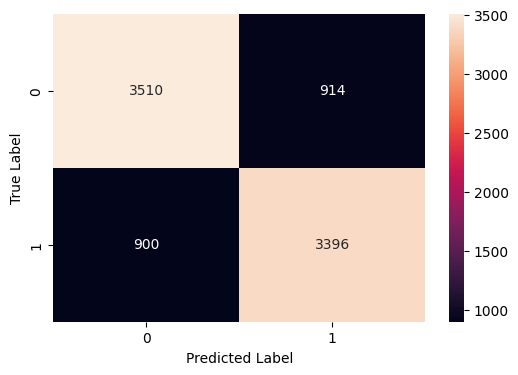

In [10]:
# show the confusion matrix 
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()